# CEEL82B Expt 2: Implementation of Principal Component Analysis

The dataset description says,
> The Iris dataset was used in R.A. Fisher's classic 1936 paper, "The Use of Multiple Measurements in Taxonomic Problems", and can also be found on the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/). It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. This dataset became a typical test case for many statistical classification techniques in machine learning such as support vector machines.

![sepal-petal of 3 Iris'](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

The data set consists of 50 samples from each of three species of Iris: **Iris Setosa, Iris virginica, and Iris versicolor.**. Therefore, each sample will have a ```label``` from one of these three species.

Four ```features``` were measured from each sample: the length and the width of the sepals and petals, in centimeters. These features are: **Sepal Length, Sepal Width, Petal Length, and Petal Width.**

Importing all necessary libraries..

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from pandas.plotting import andrews_curves, parallel_coordinates, radviz
%matplotlib inline

General Steps:
1. Load the dataset (Use pandas )
2. Data Preprocessing (Handling NA values)
3. Exploratory Data Analysis (understanding the relationships between the variables with help of plot, scatter-plot, enery-plot etc) Use matplotlib (What variables to include, sample size)
4. Apply Nomalization and Generate Covariance Matrix
5. Apply PCA
6. Build the model, summarize it and evaluate the model and Summarize 
7. Tuning the model

In [50]:
df = pd.read_csv('iris.data')
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [51]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Exploratory Data Analysis

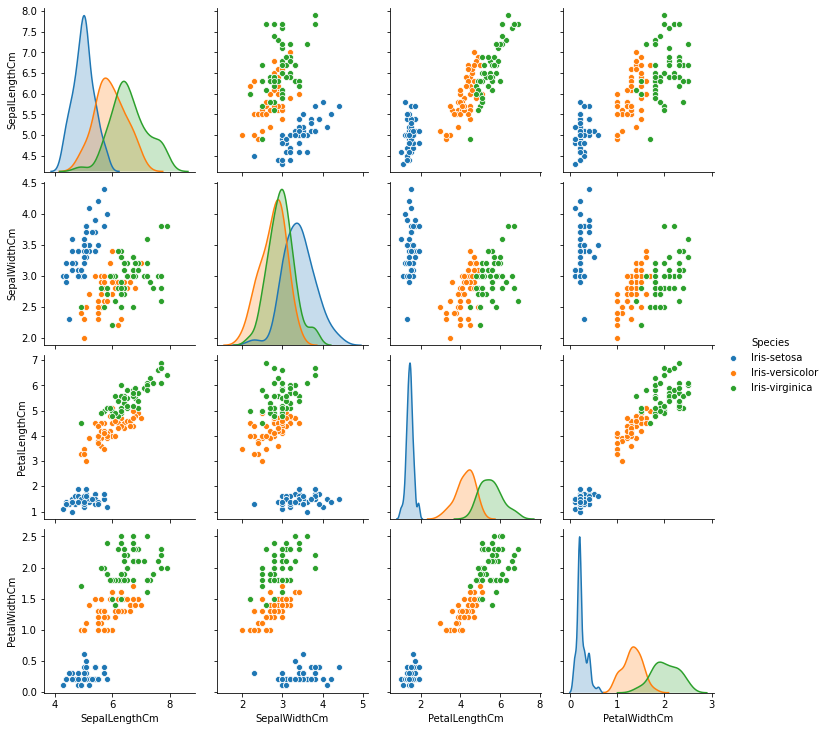

In [53]:
sns.pairplot(df, hue='Species')

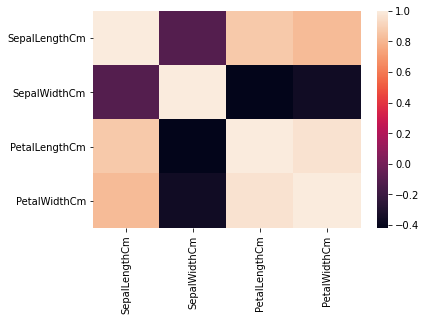

In [54]:
sns.heatmap(df.corr())

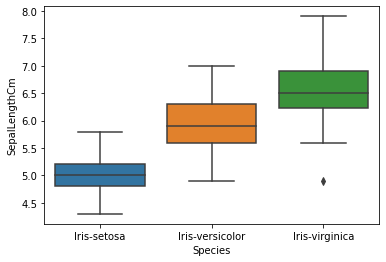

In [55]:
sns.boxplot(x="Species", y="SepalLengthCm", data = df)

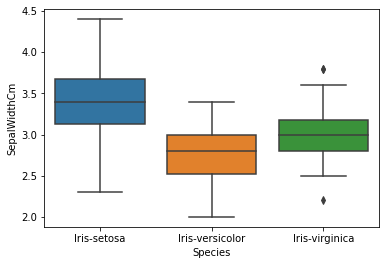

In [56]:
sns.boxplot(x="Species", y="SepalWidthCm", data = df)

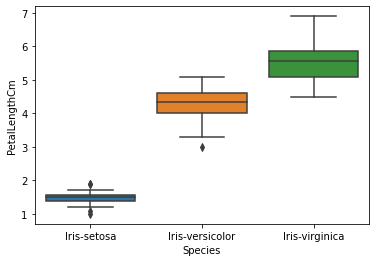

In [57]:
sns.boxplot(x="Species", y="PetalLengthCm", data = df)

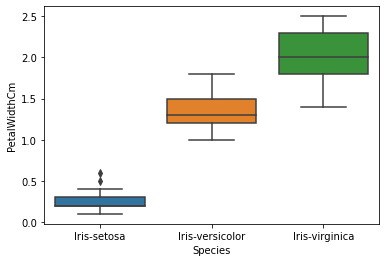

In [58]:
sns.boxplot(x="Species", y="PetalWidthCm", data = df)

Thus we don't need to perform Preprocessing to clean the data as all values are present, and no anomaly is found

### Multivariate Vizualisation Techniques

Andrews Curves involve using attributes of samples as coefficients for Fourier series and then plotting these

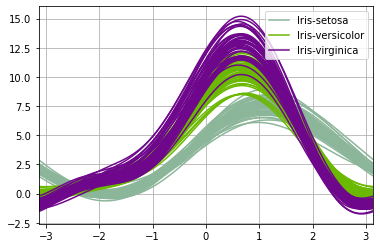

In [59]:
andrews_curves(df, "Species")

Parallel coordinates plots each feature on a separate column & then draws lines connecting the features for each data sample

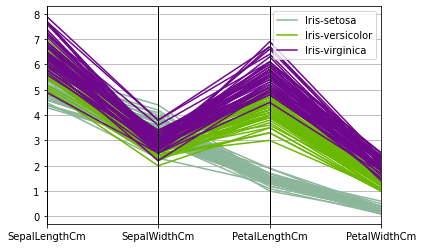

In [60]:
parallel_coordinates(df, "Species")

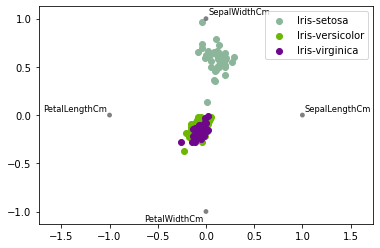

In [61]:
radviz(df, "Species")

Generating the feature matrix, and removing the target vector

Here, we observe that:
1. It's easier to distinguish `iris-sentosa` from `iris-versicolor` and `iris-viginica`. 
2. It's tougher to distinguish between `iris-versicolor` and `iris-viginica`.

In [66]:
X = df.drop(columns=['Species'])
Y = df['Species']
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Standardization and Scaling

In [67]:
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X)
X = X.rename(columns={0:'SepalLengthCm',1:'SepalWidthCm',2:'PetalLengthCm',3:'PetalWidthCm'})
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


Top k=2 singular values and corresponding eigenvectors

In [68]:
# Singular Value Decoposition
u, s, v = np.linalg.svd(X)

# Estimate singular values
singular_values = s*s/(X.shape[0]-1)

In [69]:
k = 2
print(f"Top {k} eigen values:")
print(singular_values[:k])

print(f"Top {k} eigen vectors:")
print(v.T[:,0])
print(v.T[:,1])

print('Projection matrix is: ')
print(v.T[:,:2])

Top 2 eigen values:
[2.93035378 0.92740362]
Top 2 eigen vectors:
[ 0.52237162 -0.26335492  0.58125401  0.56561105]
[-0.37231836 -0.92555649 -0.02109478 -0.06541577]
Projection matrix is: 
[[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [70]:
# Data in reduced dimension
X_reduced = np.matmul(np.array(X),v.T[:,:2])
pd.DataFrame(X_reduced)

,0,1
0,-2.264542,-0.505704
1,-2.086426,0.655405
2,-2.367950,0.318477
3,-2.304197,0.575368
4,-2.388777,-0.674767
...,...,...
145,1.870522,-0.382822
146,1.558492,0.905314
147,1.520845,-0.266795
148,1.376391,-1.016362


Vizualise calculated PCA in reduced space


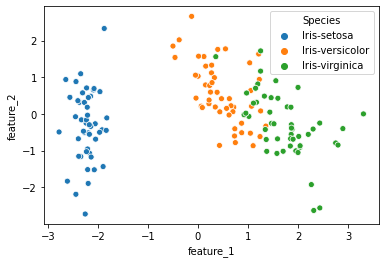

In [75]:
# Visualize the samples in reduced space
print("Vizualise calculated PCA in reduced space")
dataset_new = pd.concat([pd.DataFrame(X_reduced),pd.DataFrame(Y)], axis=1)
dataset_new = dataset_new.rename(columns={0:"feature_1",1:"feature_2"})
ax = sns.scatterplot(x="feature_1", y="feature_2", hue="Species", data=dataset_new)
plt.show()

Comparison with Plot of PCA using scikit-learn


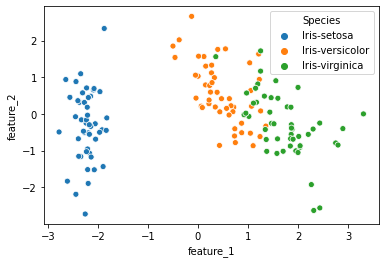

In [76]:
print('Comparison with Plot of PCA using scikit-learn')
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced_scikit = pca.fit_transform(X)
dataset_new_scikit = pd.concat([pd.DataFrame(X_reduced_scikit),pd.DataFrame(Y)], axis=1)
dataset_new_scikit = dataset_new.rename(columns={0:"feature_1",1:"feature_2"})
ax = sns.scatterplot(x="feature_1", y="feature_2", hue="Species", data=dataset_new_scikit)
plt.show()

### Conclusion

1. Learnt how to do PCA and implement it on Iris dataset from the UCI ML repository.
2. We found that the dataset was clean, and did not need preprocessing. Moving on to the EDA, we found that most of the features when plotted against one another, mostly had clear clusters of Setosa, Versicolor, Verginica. This can also be confirmed by the correlation heatmap, that showed that SepalWidth was negatively correlated with all other columns, whereas all others were positively correlated. We also did some boxplots to see if there were any outliers that needed to be removed, but found none. This was followed by Multivariate Visualisation techniques like Andrews Curves, Parallel coordinates etc were applied to see the nature of the data. We concluded that it's easier to distinguish iris-sentosa from iris-versicolor and iris-viginica and it's tougher to distinguish between iris-versicolor and iris-viginica.
3. Following the EDA, we applied PCA, by finding the Singular Value Decomposition of the matrix, after data was scaled. This was used to find the singular values and also the top 2 eigen values and eigen vectors, which then form the 2 axes of the data for vizualisation. Thus in our plot, we validate the observations from EDA, that it's easier to distinguish between iris-sentosa and iris-versicolor/iris-viginica and it's tougher to distinguish between iris-versicolor and iris-viginica. But we observe that the data can be roughly classified into 3 seperate clusters, as seen in the PCA reduced dimensions, that reduce data's variation along each axes. We were thus able to have a vizualisation on the clustering of the classes in 2d rather than the 4d data initially using PCA.
4. To validate our PCA plot, we applied PCA using scikit learn and found the exact same plot, thus verifying the correctness of the dimensionality reduction using PCA. 